# Lab | Customer Analysis Round 4

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 1. Check the data types of the columns. 

- Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [17]:
df.shape

(9134, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
numerical_df = df[df.select_dtypes('number').columns]
numerical_df

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [6]:
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [7]:
categorical_df = df[df.select_dtypes('object').columns] 
categorical_df

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### 2. Check the normality of the numerical variables visually
- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms

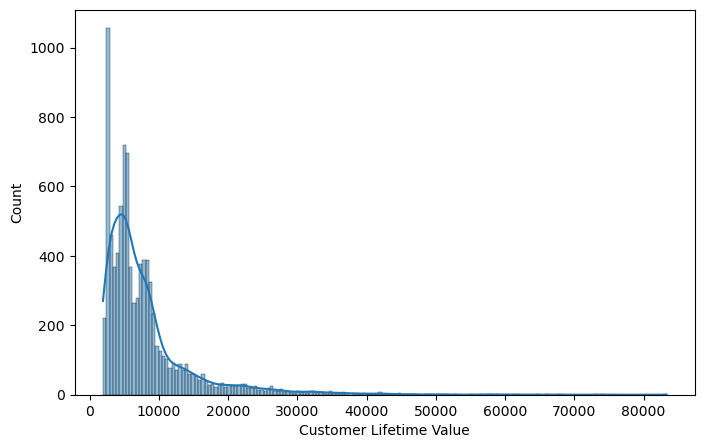

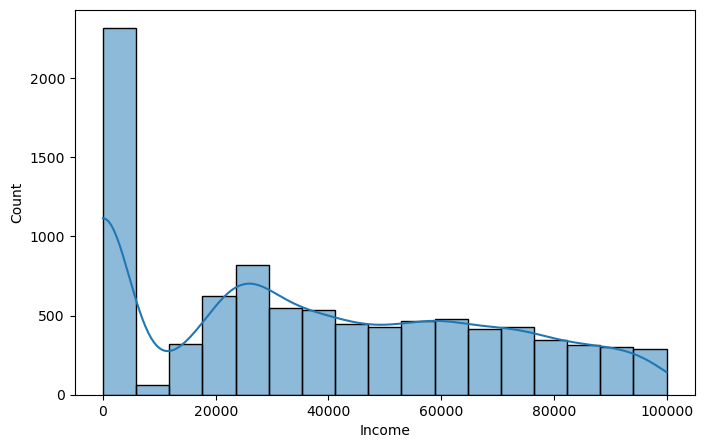

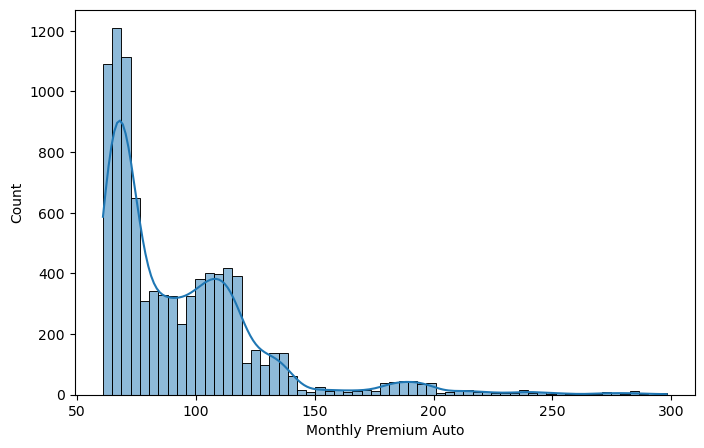

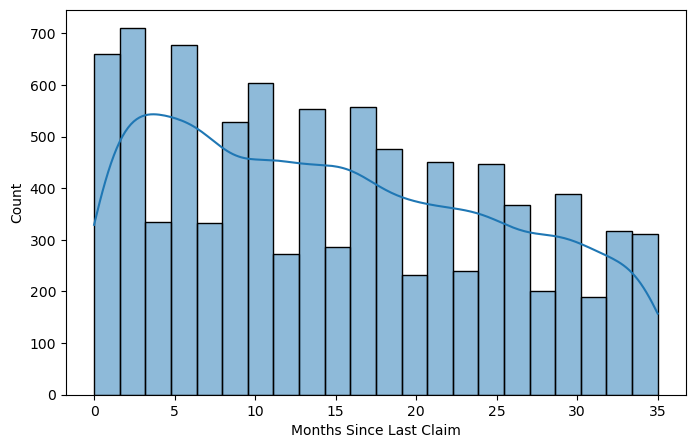

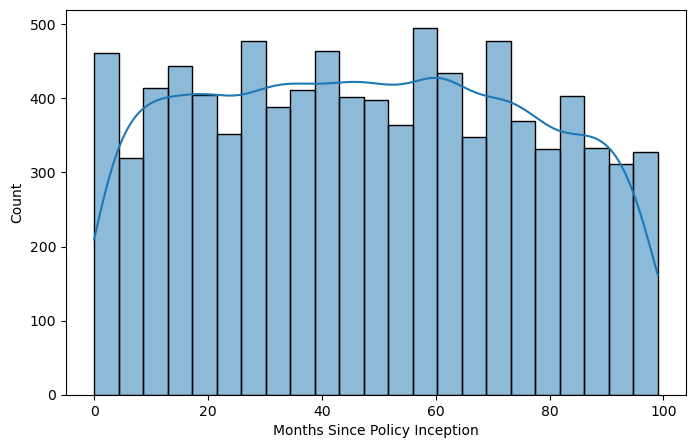

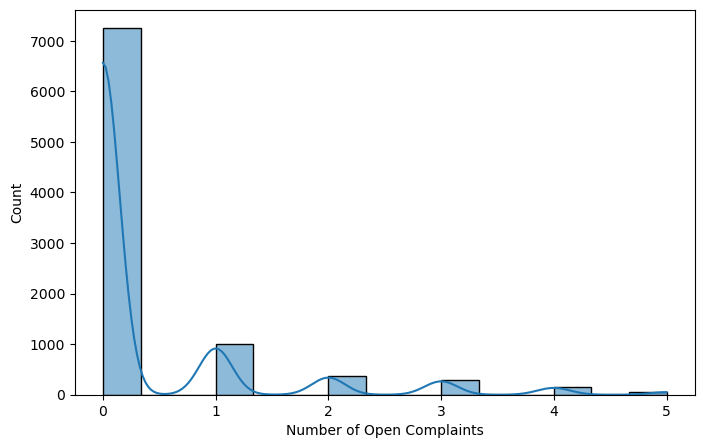

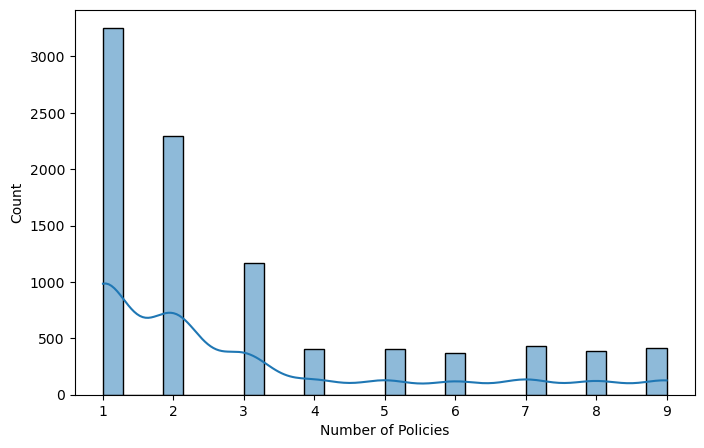

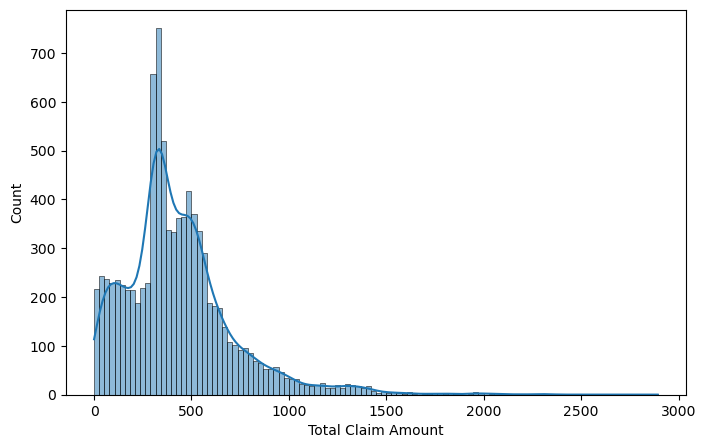

In [8]:
for column in numerical_df:
    plt.figure(figsize=(8,5))
    sns.histplot(numerical_df[column], kde=True)
    plt.show()

<Figure size 1300x1300 with 0 Axes>

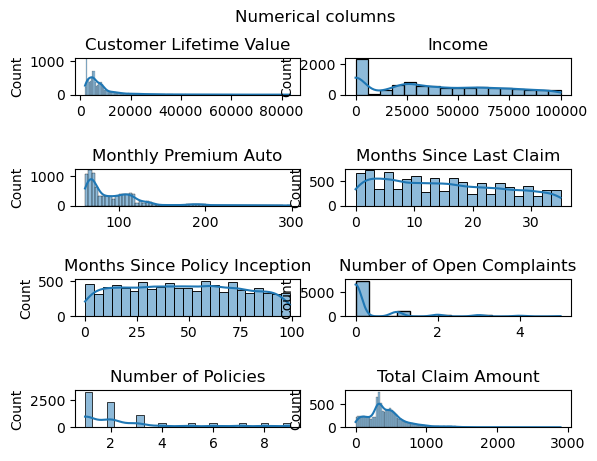

In [21]:
plt.figure(figsize=(13, 13))
plt.subplots(4,2) 
plt.subplots_adjust(hspace=2) # height reserved for space between subplots, expressed as a fraction of the average axis height
plt.suptitle('Numerical columns')

for n,c in enumerate(numerical_df.columns):
    ax=plt.subplot(4,2,n+1) #index in subplot matrix starts at 1
    sns.histplot(df[c], kde=True)
    ax.set_title(c)
    ax.set_xlabel("")
    
plt.show()

#### A) Log transform
- Do the distributions for different numerical variables look like a normal distribution

In [10]:
def log_transform(x):
    x = np.log(x)            
    if np.isfinite(x):     
        return x
    return np.nan

In [11]:
df_log = pd.DataFrame()

for column in numerical_df.columns:
    df_log[column] = numerical_df[column].apply(log_transform)
df_log.head(3)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,7.924260,10.937988,4.234107,3.465736,1.609438,NaN,0.000000,5.952753
1,8.850738,NaN,4.543295,2.564949,3.737670,NaN,2.079442,7.031268
2,9.464008,10.794809,4.682131,2.890372,3.637586,NaN,0.693147,6.339428


In [12]:
numerical_df.head(3)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247


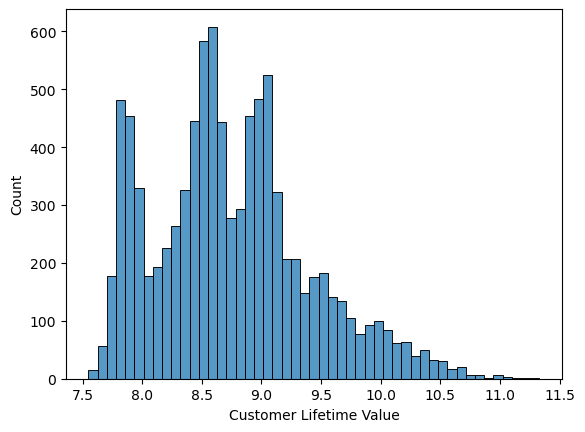

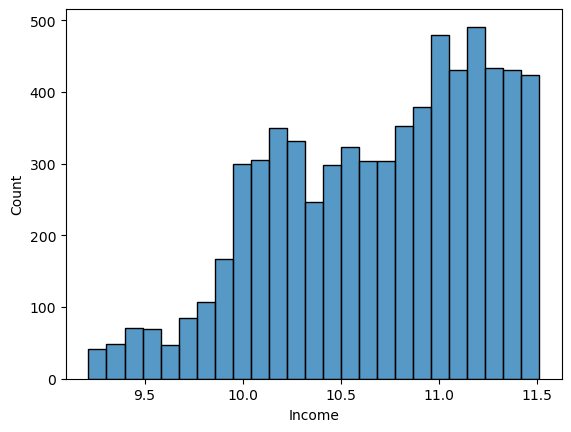

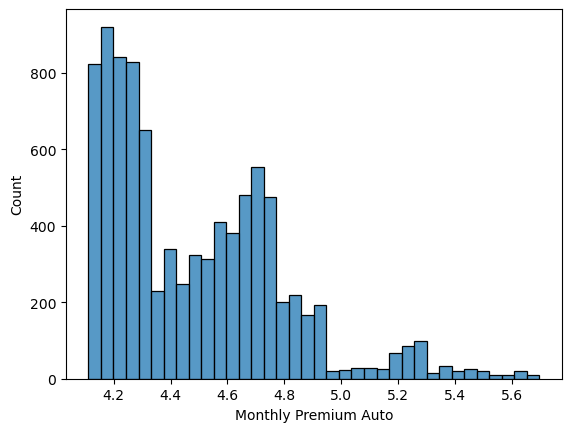

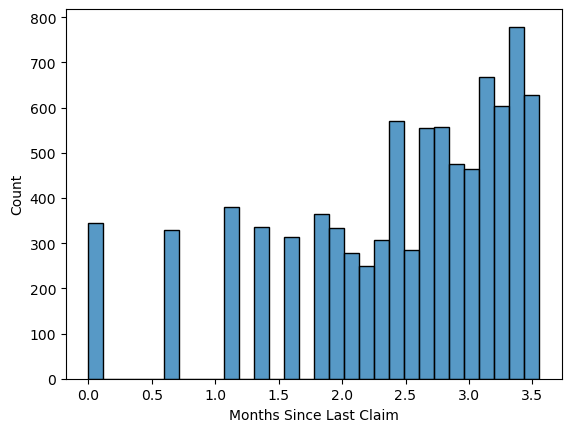

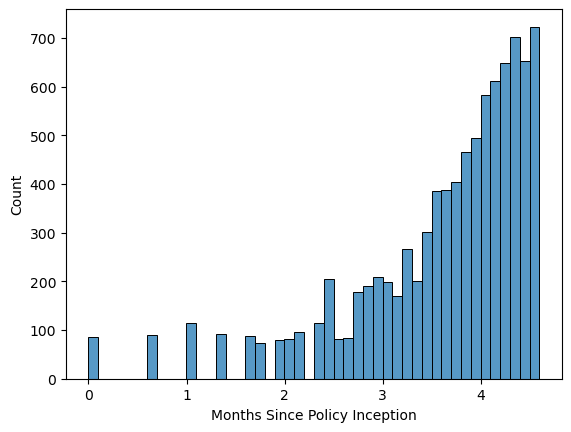

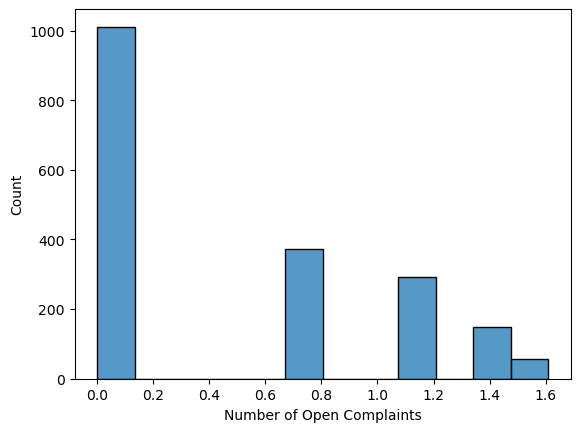

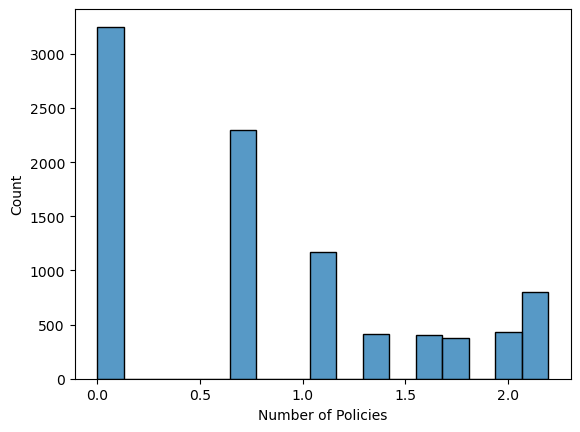

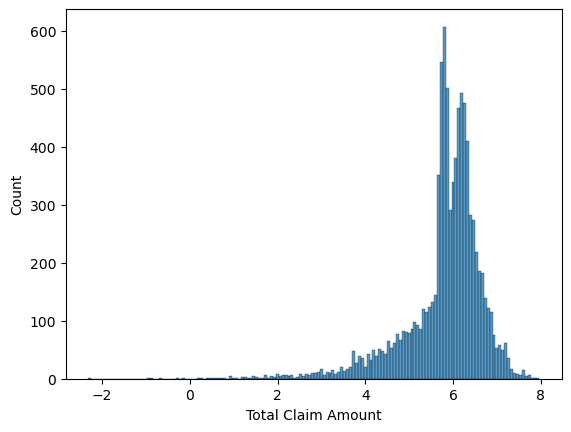

In [27]:
for column in df_log:
    sns.histplot(df_log[column])
    plt.show()

#### B) Standar Scaler
- Do the distributions for different numerical variables look like a normal distribution

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [30]:
minmax_scale = MinMaxScaler()
minmax_scale.fit(numerical_df)

MinMaxScaler()

In [31]:
minmax_scale.data_min_

array([1.89800768e+03, 0.00000000e+00, 6.10000000e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 9.90070000e-02])

In [33]:
minmax_scale.data_max_

array([8.33253812e+04, 9.99810000e+04, 2.98000000e+02, 3.50000000e+01,
       9.90000000e+01, 5.00000000e+00, 9.00000000e+00, 2.89323968e+03])

In [42]:
df_minmax = pd.DataFrame(minmax_scale.transform(numerical_df), columns= ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'])

#### Gráficas MinMax Scaler

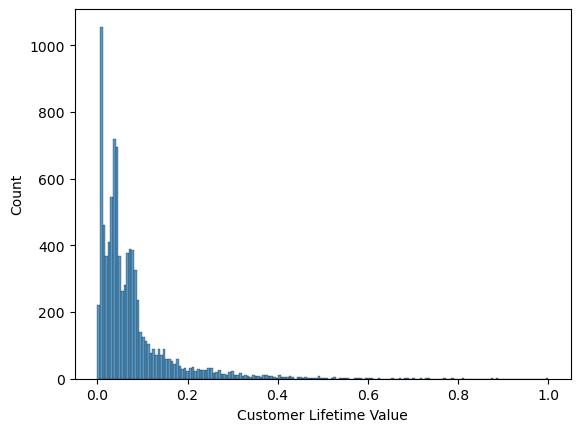

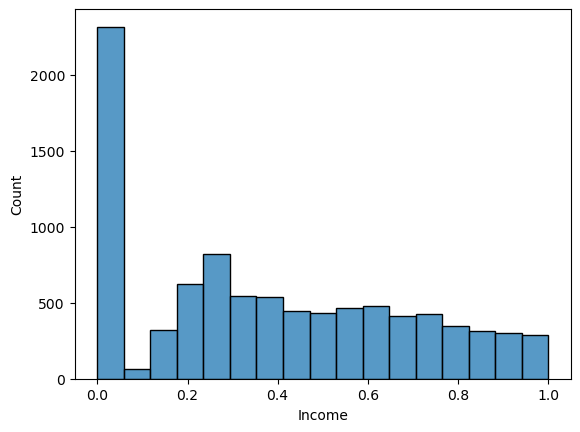

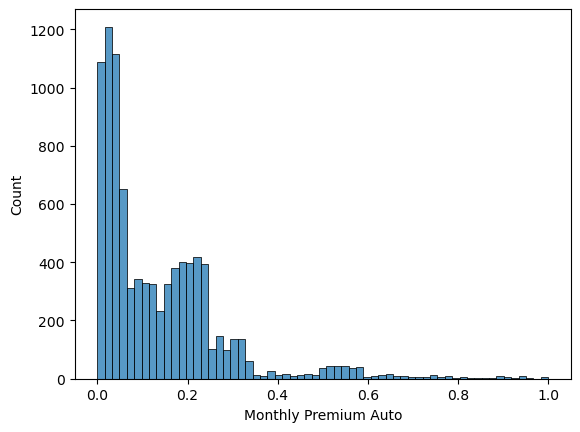

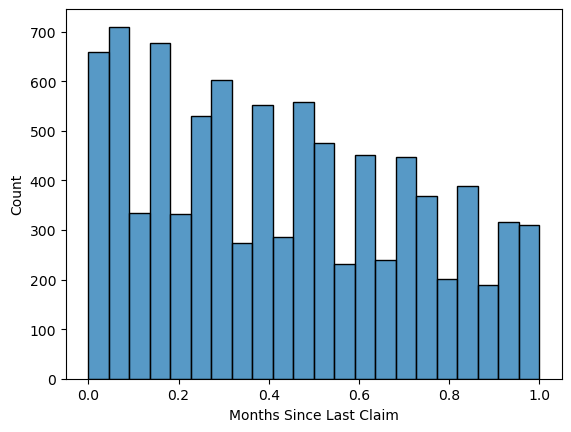

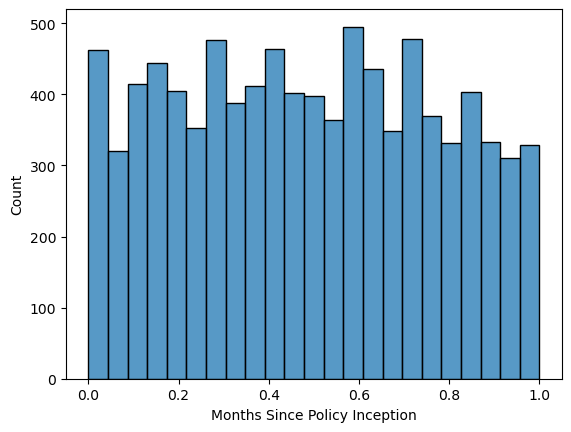

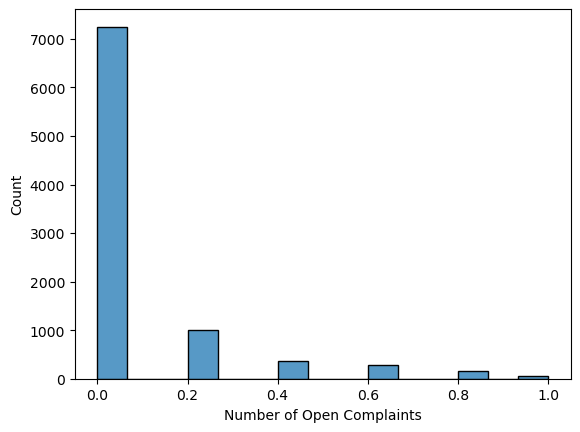

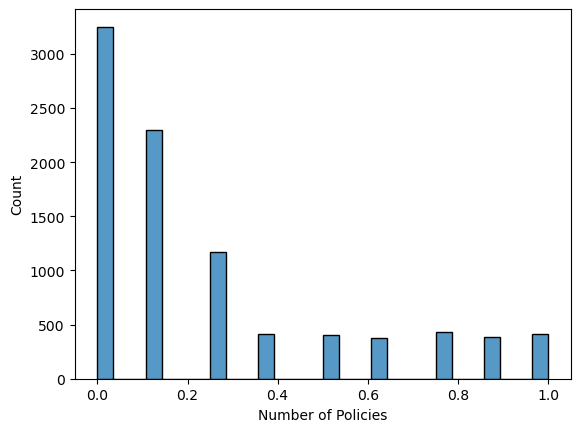

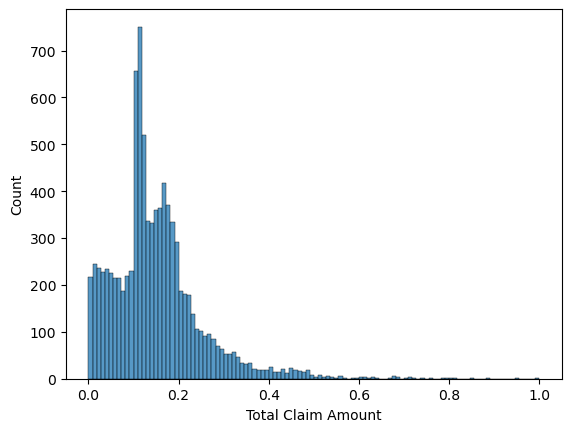

In [43]:
for column in df_minmax:
    sns.histplot(df_minmax[column])
    plt.show()

#### C) Standar Scaler
- Do the distributions for different numerical variables look like a normal distribution

In [49]:
numerical_df.describe().T
# La media será de 0 y la desviación estándar igual en 1

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [48]:
standard_scale = StandardScaler()
standard_scale.fit(numerical_df)

StandardScaler()

In [51]:
standard_scale.mean_

array([8.00494047e+03, 3.76573800e+04, 9.32192906e+01, 1.50970002e+01,
       4.80645938e+01, 3.84388001e-01, 2.96617035e+00, 4.34088794e+02])

In [53]:
standard_scale.var_

array([4.72050273e+07, 9.22837567e+08, 1.18377860e+03, 1.01459389e+02,
       7.78659064e+02, 8.28707437e-01, 5.71234362e+00, 8.43810642e+04])

In [54]:
df_standard_scaled = pd.DataFrame(standard_scale.transform(numerical_df), columns= ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'])

In [56]:
df_standard_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,4.006235e-17,1.000055,-0.888851,-0.583747,-0.323809,0.139322,10.962730
Income,9134.0,7.467933e-17,1.000055,-1.239617,-1.239617,-0.124032,0.811851,2.051587
Monthly Premium Auto,9134.0,-1.487752e-16,1.000055,-0.936442,-0.732989,-0.297020,0.458660,5.951875
Months Since Last Claim,9134.0,4.472981e-17,1.000055,-1.498803,-0.903134,-0.108908,0.784596,1.975934
Months Since Policy Inception,9134.0,1.003504e-16,1.000055,-1.722470,-0.862392,-0.002315,0.821926,1.825350
Number of Open Complaints,9134.0,7.623515e-17,1.000055,-0.422250,-0.422250,-0.422250,-0.422250,5.070242
Number of Policies,9134.0,-1.361342e-17,1.000055,-0.822648,-0.822648,-0.404247,0.432555,2.524561
Total Claim Amount,9134.0,-3.656176e-17,1.000055,-1.494022,-0.557106,-0.172620,0.390472,8.465696


#### Gráficas Standard Scaler

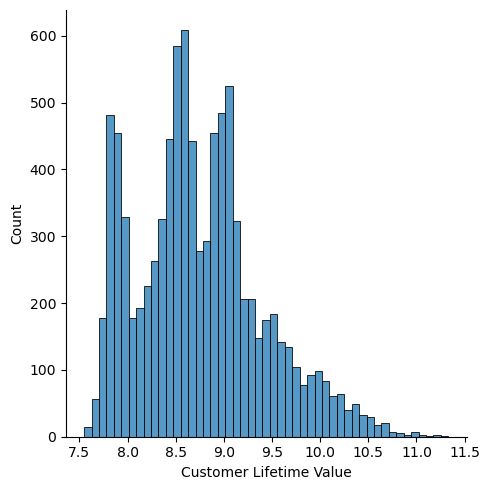

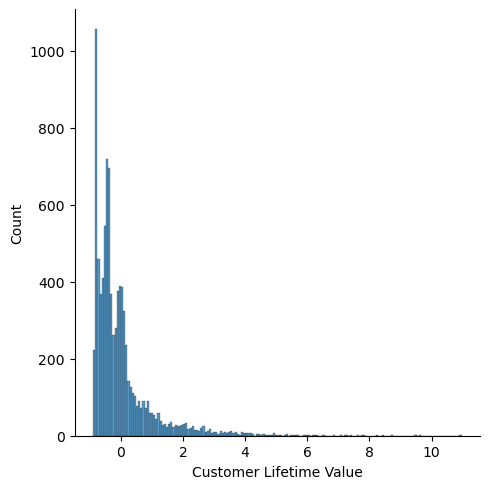

----------------------------------------------------------------------------------------------------


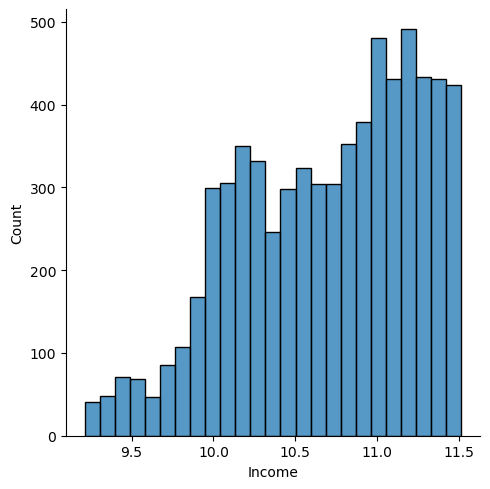

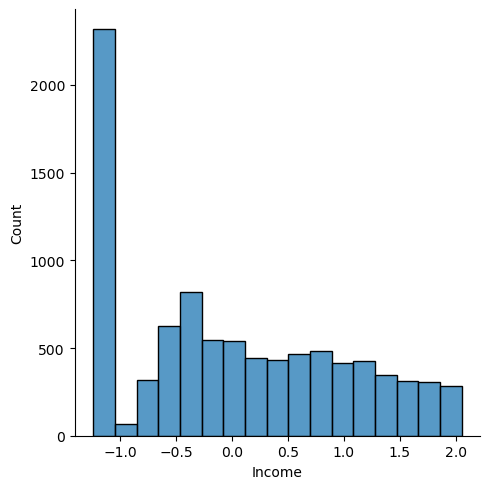

----------------------------------------------------------------------------------------------------


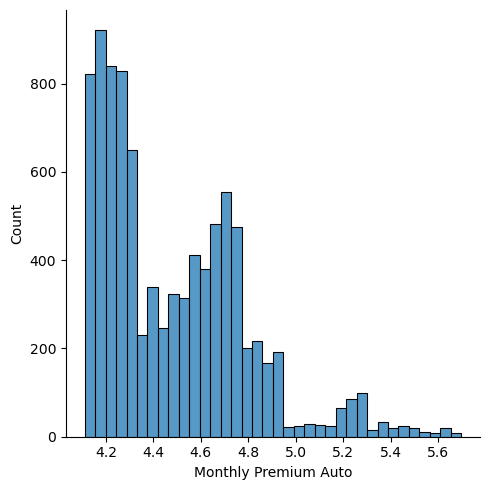

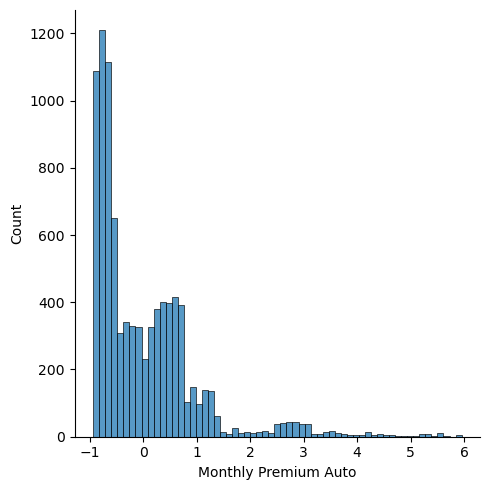

----------------------------------------------------------------------------------------------------


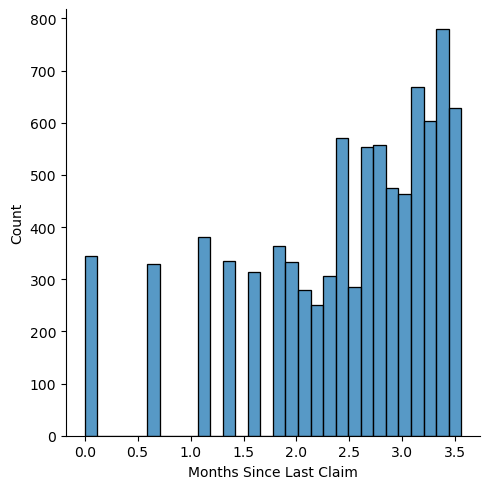

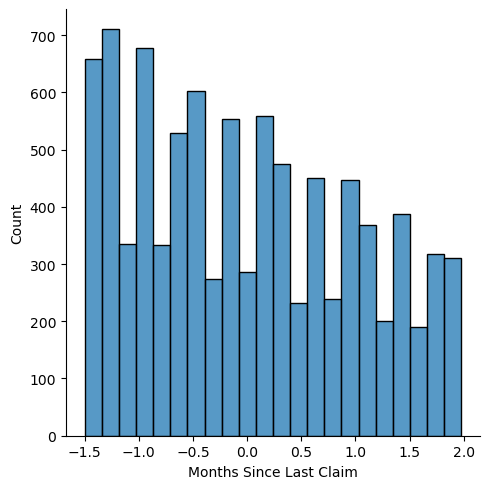

----------------------------------------------------------------------------------------------------


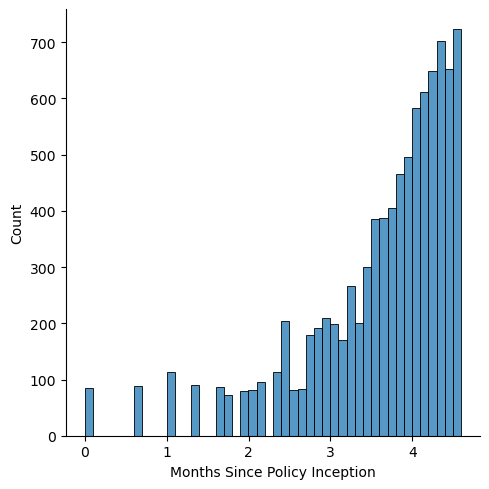

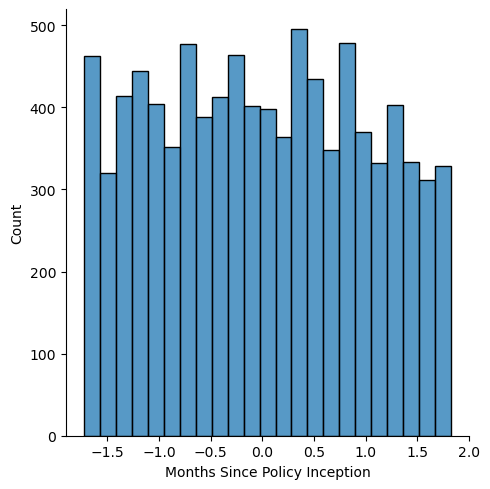

----------------------------------------------------------------------------------------------------


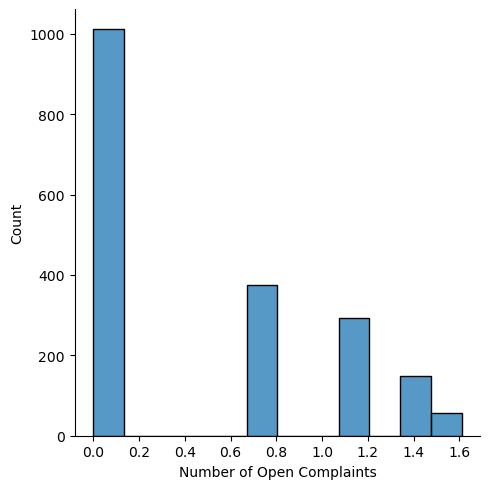

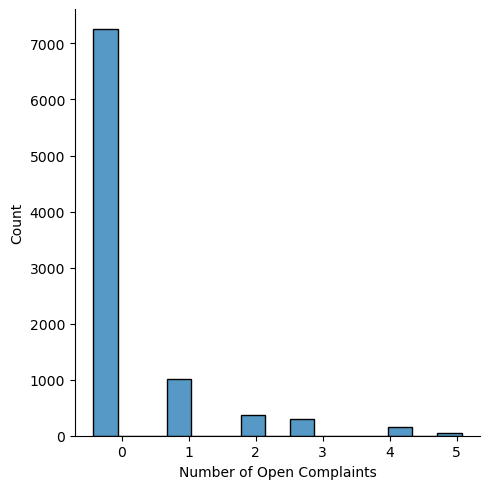

----------------------------------------------------------------------------------------------------


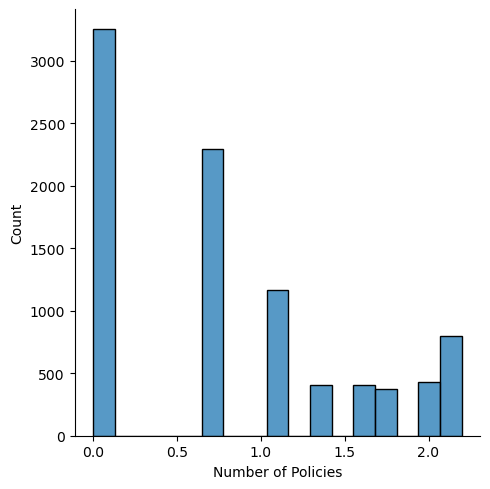

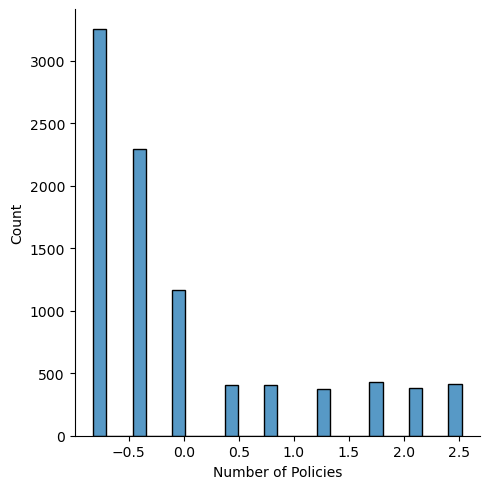

----------------------------------------------------------------------------------------------------


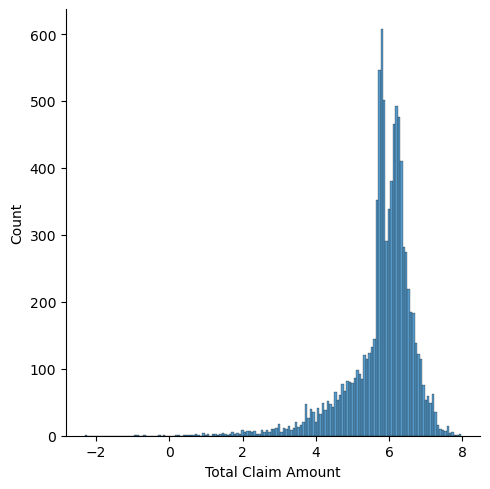

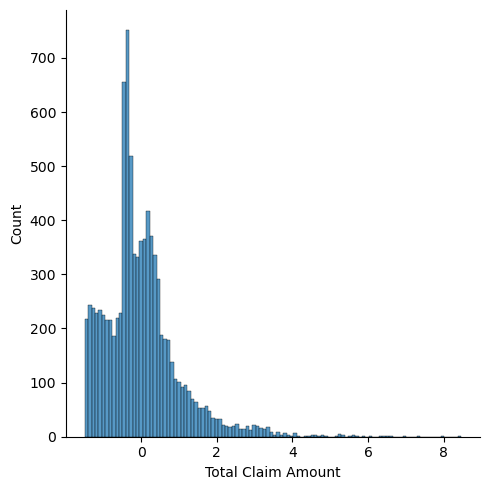

----------------------------------------------------------------------------------------------------


In [60]:
for column in ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount']:
    sns.displot(df_log[column])
    sns.displot(df_standard_scaled[column])
    plt.show()
    print('-'*100)

#### D) Robust Scaler
- Do the distributions for different numerical variables look like a normal distribution

In [61]:
robust_scale = RobustScaler()

In [73]:
robust_scale.fit(numerical_df)

RobustScaler()

In [74]:
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [75]:
robust_scale.center_ 
#Mediana de mi dataframe (50%)

array([5.78018220e+03, 3.38895000e+04, 8.30000000e+01, 1.40000000e+01,
       4.80000000e+01, 0.00000000e+00, 2.00000000e+00, 3.83945434e+02])

In [76]:
robust_scale.scale_
#Resta de mi rango intercuartil 75% menos el 25%

array([4.96791525e+03, 6.23200000e+04, 4.10000000e+01, 1.70000000e+01,
       4.70000000e+01, 1.00000000e+00, 3.00000000e+00, 2.75256594e+02])

In [65]:
df_robust_scaled = pd.DataFrame(robust_scale.transform(numerical_df), columns= ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'])

In [77]:
df_robust_scaled.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9.134000e+03
mean,0.447825,0.060460,0.249251,0.064529,0.001374,0.384388,0.322057,1.821695e-01
std,1.383069,0.487482,0.839219,0.592545,0.593744,0.910384,0.796727,1.055379e+00
min,-0.781449,-0.543798,-0.536585,-0.823529,-1.021277,0.000000,-0.333333,-1.394504e+00
25%,-0.359493,-0.543798,-0.365854,-0.470588,-0.510638,0.000000,-0.333333,-4.057566e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.032703e-16
75%,0.640507,0.456202,0.634146,0.529412,0.489362,0.000000,0.666667,5.942434e-01
max,15.609203,1.060518,5.243902,1.235294,1.085106,5.000000,2.333333,9.116200e+00


#### Gráficas Robust Scaler

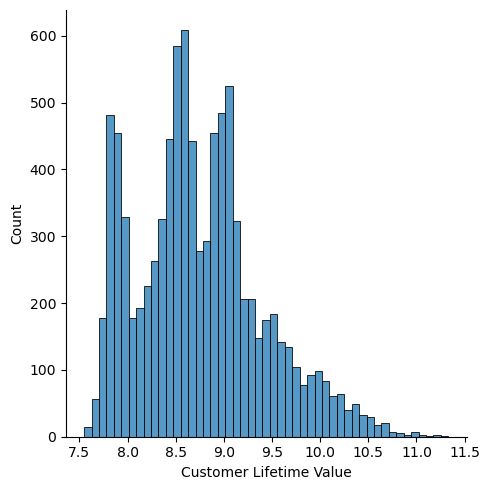

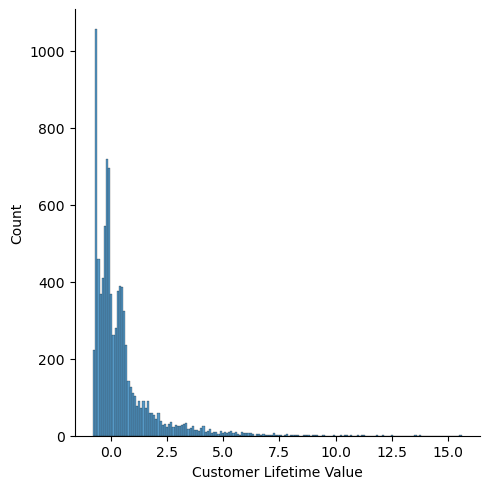

----------------------------------------------------------------------------------------------------


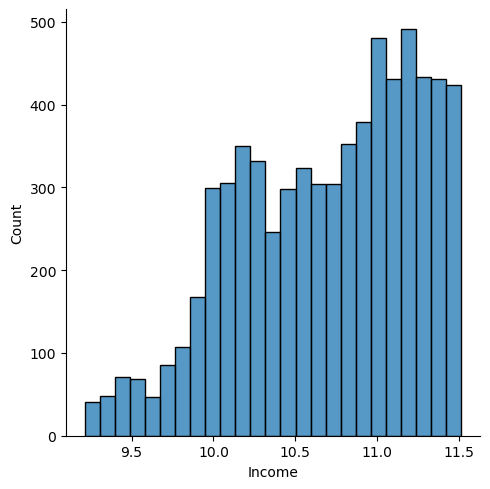

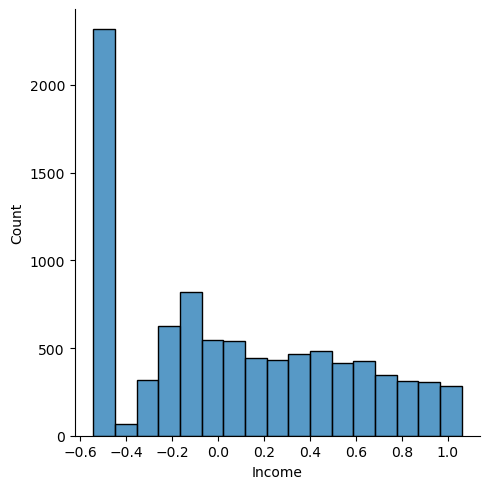

----------------------------------------------------------------------------------------------------


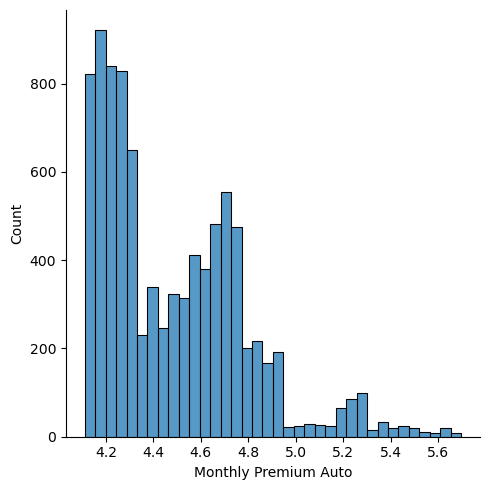

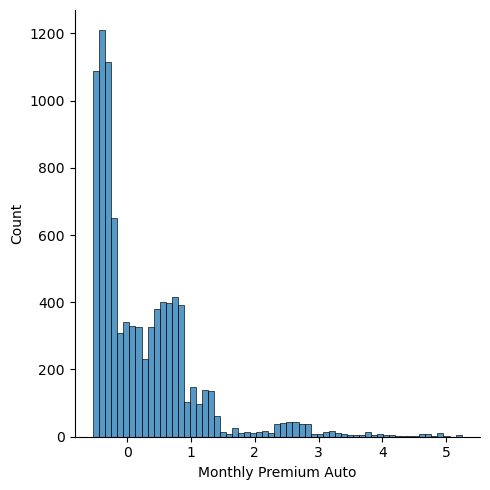

----------------------------------------------------------------------------------------------------


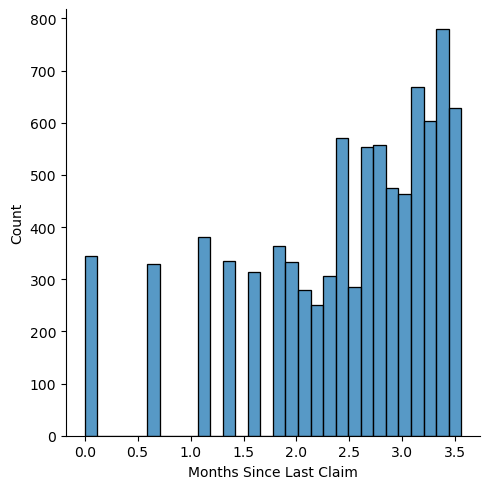

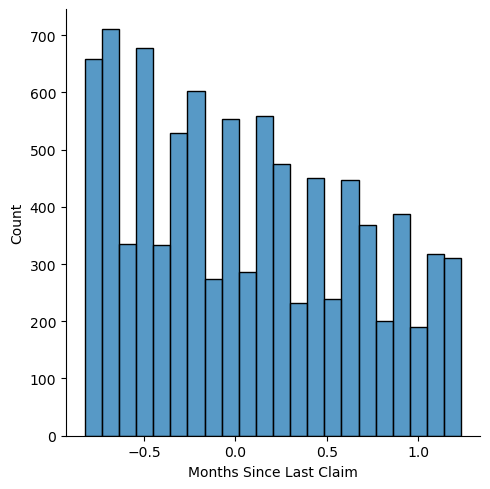

----------------------------------------------------------------------------------------------------


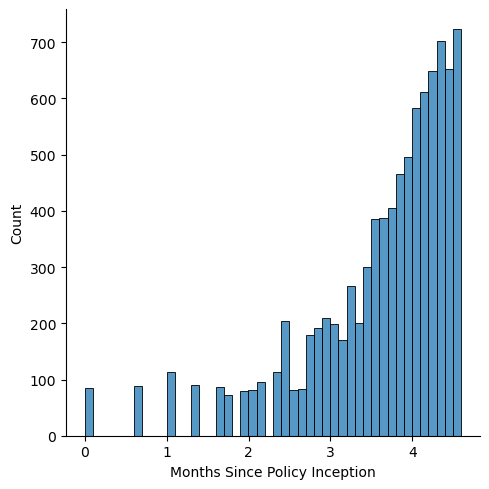

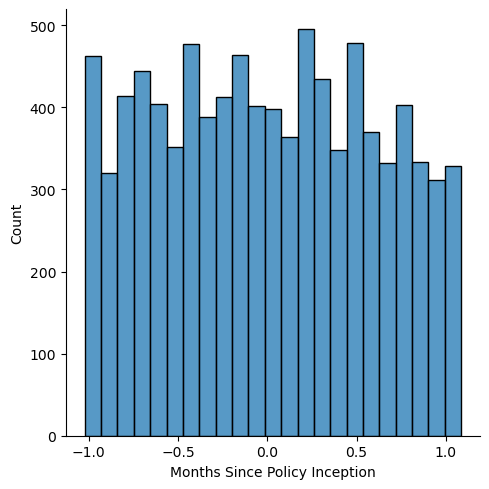

----------------------------------------------------------------------------------------------------


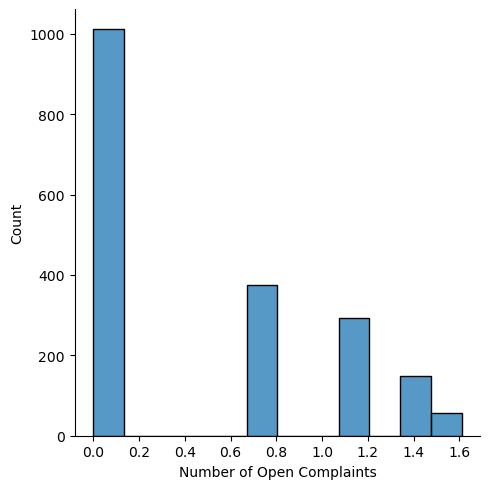

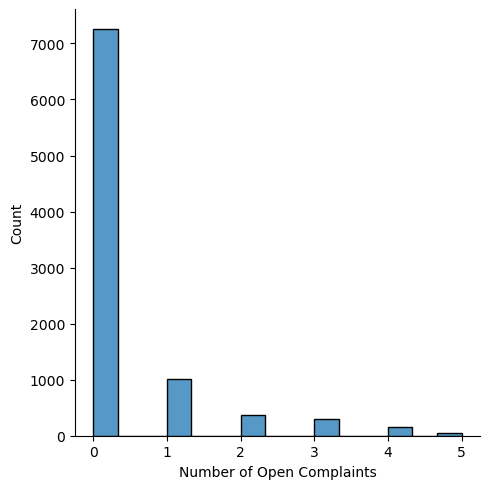

----------------------------------------------------------------------------------------------------


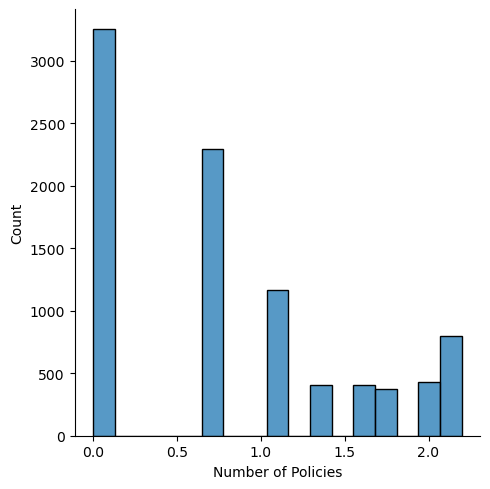

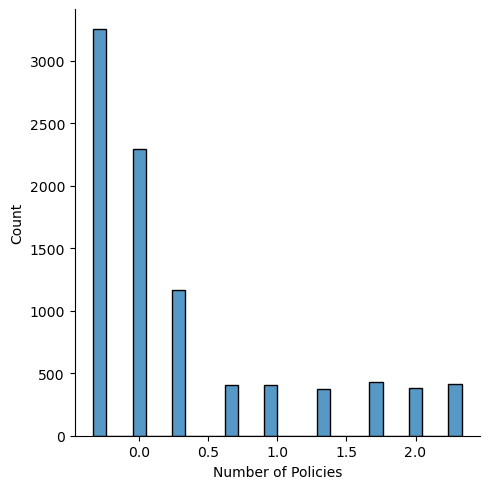

----------------------------------------------------------------------------------------------------


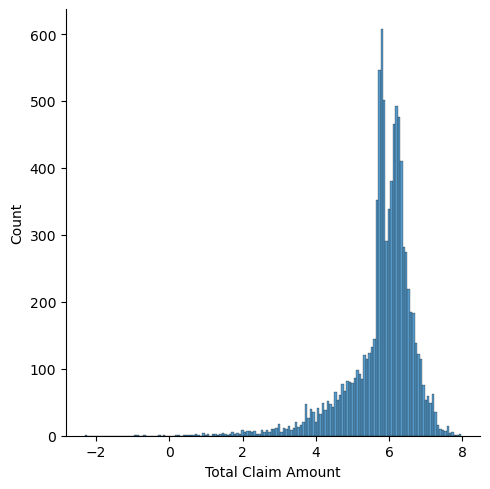

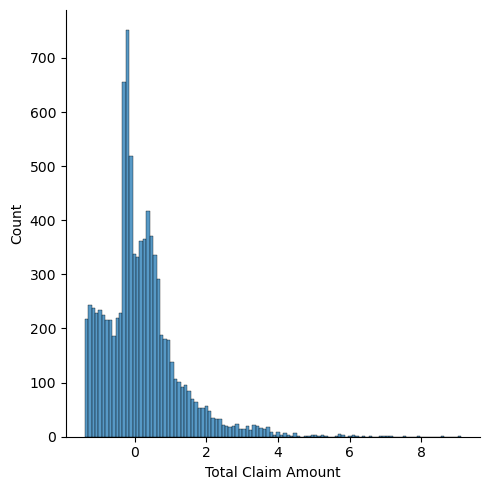

----------------------------------------------------------------------------------------------------


In [78]:
for column in ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount']:
    sns.displot(df_log[column])
    sns.displot(df_robust_scaled[column])
    plt.show()
    print('-'*100)

### 3. Check the multicollinearity between the features, for the numerical variables. 
- Please note that we will use the column total_claim_amount later as the target variable.

In [23]:
corr=numerical_df.corr()      # compute the correlation matrix
corr

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


### 4. Seaborn heatmap

- Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

<Axes: >

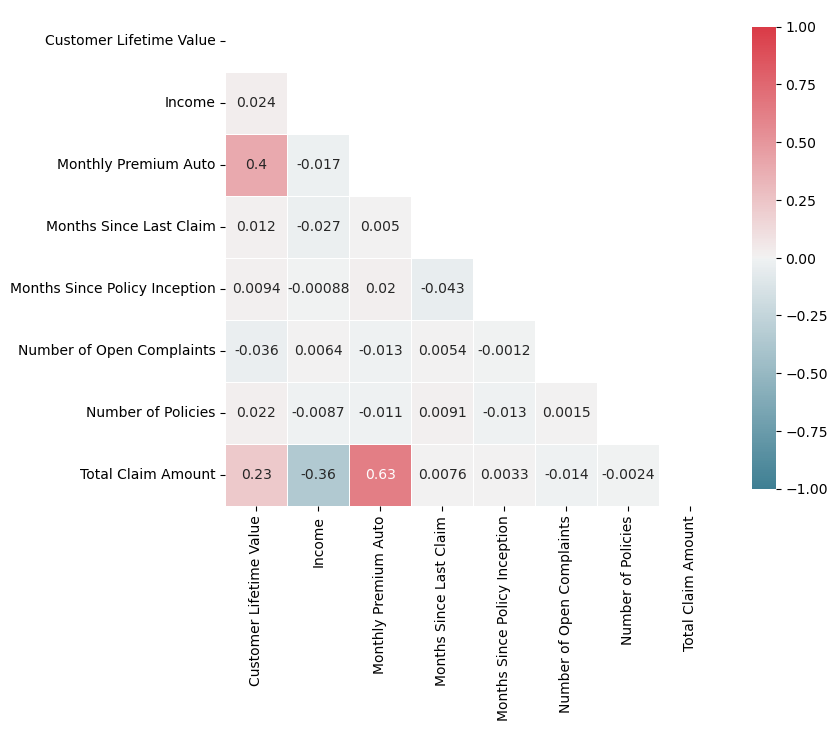

In [14]:
corr = df.select_dtypes(np.number).corr()
mask = np.triu(np.ones_like(corr, dtype = bool))                                 # generate a mask for the upper triangle
cmap = sns.diverging_palette(2020, 10, as_cmap = True)                           # generate a custom diverging colormap
plt.figure(figsize = (8, 8))                                                     # set up the matplotlib figure
sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, annot = True,
            square = True, linewidths = 0.5, cbar_kws = {'shrink' : 0.75})